In [1]:
import numpy as np

from openspeechlib.feature_extraction.utils.delta import delta
from openspeechlib.utils.signal import power
from openspeechlib.utils.windows import extract_overlapping_frames_from_signal, apply_window_function_to_frames

In [2]:
from scipy.io import wavfile

In [11]:
from matplotlib import pyplot as plt

In [3]:
frequency, signal = wavfile.read("F_10_1.wav")

In [4]:
frequency

44100

In [5]:
threshold=0.03

In [6]:
signal

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [7]:
signal.shape

(1942272,)

In [8]:
window_width = int(frequency*0.025)
windows_offset = int(frequency*0.01)
frames = extract_overlapping_frames_from_signal(
    signal,
    window_width,
    windows_offset
)
windowed_frames = apply_window_function_to_frames(frames)
energy = power(windowed_frames, axis=1)
frame_start_time = np.arange(0, signal.shape[-1], windows_offset)
interpolated_values = np.interp(np.arange(0, signal.shape[0]), frame_start_time, energy, )

In [9]:
interpolated_values

array([3.87053187e+00, 1.34546879e+04, 2.69055053e+04, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

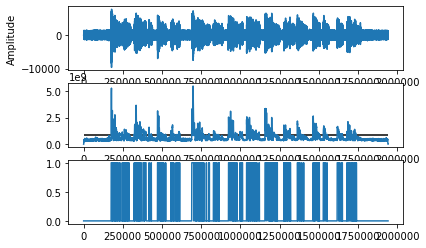

In [24]:

threshold=0.15
signal_size = signal.shape[-1]

plt.subplot(311)
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(312)
plt.plot(np.arange(0, signal_size), interpolated_values)
plt.hlines(np.max(interpolated_values)*threshold, 0, signal_size)
plt.subplot(313)
voice_ranges = np.where(interpolated_values > np.max(interpolated_values) * threshold, 1, 0)
plt.plot(np.arange(0, signal_size), voice_ranges)

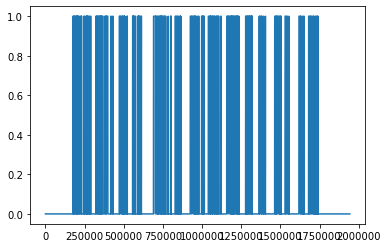

In [19]:
plt.plot(np.arange(0, signal_size), voice_ranges)